## Settings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install geojson

In [ ]:
# The following pip commands all have -q (quiet) at the end which hides (most of) their output. Remove the -q if you want to see the details
!pip install geemap -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.4 MB/s eta 0:00:00


In [ ]:
pip install cartopy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 39.2 MB/s eta 0:00:00


In [ ]:
# uninstalling flask b/c it leads to version conflicts later and is not needed
!pip uninstall flask -y -q

In [ ]:
!pip install kml2geojson google-api-python-client -q

In [ ]:
# installing the touchterrain module from github
!pip install git+https://github.com/ChHarding/TouchTerrain_for_CAGEO.git

  Cloning https://github.com/ChHarding/TouchTerrain_for_CAGEO.git to /tmp/pip-req-build-oxj_a5k0
  Running command git clone --filter=blob:none --quiet https://github.com/ChHarding/TouchTerrain_for_CAGEO.git /tmp/pip-req-build-oxj_a5k0
  Resolved https://github.com/ChHarding/TouchTerrain_for_CAGEO.git to commit 418e32a4d38d802b973823e704b8edba24d2a86f
  Preparing metadata (setup.py) ... done
  Created wheel for touchterrain: filename=touchterrain-3.6.0-py3-none-any.whl size=70703 sha256=7008bdb216e2cb4c458a3ade44ef135841c0389cd830cc1b5296e9b9eb8e3cff
  Stored in directory: /tmp/pip-ephem-wheel-cache-s9i3lgfp/wheels/1d/3d/6f/114172ad6300a219704cbf913842326c56a7d0ddfef9567257
Successfully built touchterrain


In [ ]:
# Download some example files, these will eventually show up in the Files tab on the left
# More on how to use these later

# Example local geotiff DEM file
!curl -LJO https://github.com/ChHarding/TouchTerrain_for_CAGEO/raw/master/stuff/geotiff_example.tif

# Example of a gpx path (trail
!curl -LJO https://github.com/ChHarding/TouchTerrain_for_CAGEO/raw/master/stuff/gpx-test/example_path.gpx

# Example of kml polygon file
!curl -LJO https://github.com/ChHarding/TouchTerrain_for_CAGEO/raw/master/stuff/polygon_example.kml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  484k  100  484k    0     0   548k      0 --:--:-- --:--:-- --:--:--  548k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  407k  100  407k    0     0   404k      0  0:00:01  0:00:01 --:--:-- 10.1M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2536  100  2536    0     0   3321      0 --:--:-- --:--:-- --:--:--  3321


In [ ]:
# Authenticates and initializes Earth Engine
import ee

try:
    ee.Initialize()
except Exception as e: # if the initialization didn't work, web authenticate first
    ee.Authenticate()
    ee.Initialize(project='ee-moros2')

## Reading Data - Harmonized / soc observations on CONUS

**The automation pipeline** integrates data from Google Earth Engine (GEE) to retrieve relevant covariates for modeling soil organic carbon (SOC).

**The pipeline** is designed to enhance the existing soil profile dataset with additional variables that improve the predictive modeling of SOC.

**Input**: The input consists of a CSV file containing soil profile data, including latitude, longitude, soil ID, year, and six depth levels for each profile.

**Process**: The pipeline accesses the GEE API (assuming proper user permissions) to retrieve the necessary covariates, expanding the input table horizontally by adding new columns.

Dynamic variables as temperature and precipitation are aggregated by year, while some covariates, such as clay, silt, and sand, are depth-dependent. Others, like location-based variables, remain constant over time. The output is generated in batches, ensuring efficient processing.

### Reading the csv with SOC observations

In [ ]:
import pandas as pd
import numpy as np

pathindrive=''
path=pathindrive+'/InputSoilData/'
# Read the data in CSV format
soil_armonized = pd.read_csv(path+'Harmonized_SOC_CONUS.csv')
soil_armonized_neon = pd.read_csv(path+'Harmonized_SOC_NEON.csv')

soil_armonized = soil_armonized.dropna()
soil_armonized[:5]

,Year,Long,Lat,Soil.ID,SOC,Depth
0,2003,-88.703417,37.113506,04KY-145-001,2.741401,5
1,2003,-88.703417,37.113506,04KY-145-001,2.454345,15
2,2003,-88.703417,37.113506,04KY-145-001,1.385365,30
3,2003,-88.703417,37.113506,04KY-145-001,0.564199,60
4,2003,-88.703417,37.113506,04KY-145-001,0.321449,100


In [ ]:
soil_armonized_neon = soil_armonized_neon.dropna()
soil_armonized_neon[:5]
print(len(soil_armonized_neon))

2971


In [ ]:
repeated = []
for id in soil_armonized_neon['Soil.ID'].values:
  if id in soil_armonized['Soil.ID'].values:
    print(i)
    repeated.append(i)

In [ ]:
soil_armonized['label']='V1'
soil_armonized_neon['label']='V2-NEON'
soil = pd.concat([soil_armonized, soil_armonized_neon])
soil.head(5)

,Year,Long,Lat,Soil.ID,SOC,Depth,label
0,2003,-88.703417,37.113506,04KY-145-001,2.741401,5,V1
1,2003,-88.703417,37.113506,04KY-145-001,2.454345,15,V1
2,2003,-88.703417,37.113506,04KY-145-001,1.385365,30,V1
3,2003,-88.703417,37.113506,04KY-145-001,0.564199,60,V1
4,2003,-88.703417,37.113506,04KY-145-001,0.321449,100,V1


In [ ]:
import pandas as pd


new_column_names = {
    "Year": "year",
    "Long": "longitude",
    "Lat": "latitude",
    "Soil.ID": "soil_id",  # Consider adding underscore for readability
    "SOC": "soil_organic_carbon",
    "Depth": "depth_cm",
    "dem": "dem",  # No change needed
    "slope": "slope_norm",
    "aspect": "aspect_rad",
    "hillshade": "hillshade",  # No change needed
    "twi": "topographic_wetness_index",
    "mrvbf": "multiresolution_valley_bottomflatness",
    "clay": "clay_percent",
    "silt": "silt_percent",
    "sand": "sand_percent",
    "pH": "ph",
    "BD": "bulk_density",
    "tmax": "max_temperature",
    "tmin": "min_temperature",
    "tmean": "mean_temperature",
    "prcp": "precipitation_mm",
    "lc": "land_cover",
    "lc2": "secondary_land_cover",
    "SOC":"soil_organic_carbon"
}


# Rename the columns using the dictionary
soil_armonized_neon.rename(columns=new_column_names, inplace=True)
soil.rename(columns=new_column_names, inplace=True)
soil_armonized.rename(columns=new_column_names, inplace=True)
# Now your data has column names in lowercase and underscores
print(soil_armonized_neon.columns)  # This will print the new column names


Index(['year', 'longitude', 'latitude', 'soil_id', 'soil_organic_carbon',
       'depth_cm', 'label'],
      dtype='object')


In [ ]:
soil_armonized['soil_id'].nunique(), soil_armonized['depth_cm'].nunique(), soil_armonized['year'].nunique()

(7192, 6, 30)

In [ ]:
soil_armonized['year'].min(), soil_armonized['year'].max()

(1985, 2014)

In [ ]:
soil_armonized[soil_armonized['depth_cm']==5]

,year,longitude,latitude,soil_id,soil_organic_carbon,depth_cm,label
0,2003,-88.703417,37.113506,04KY-145-001,2.741401,5,V1
6,2008,-84.493889,38.105556,08KY-067-004,3.402706,5,V1
12,2008,-84.853332,37.848057,08KY-167-002,4.407583,5,V1
17,2009,-84.216110,38.055000,09KY-049-001,4.359238,5,V1
23,2009,-84.213333,38.052502,09KY-049-002,3.893599,5,V1
...,...,...,...,...,...,...,...
40279,1988,-91.519167,43.337500,X3-862E2,1.628634,5,V1
40284,1988,-91.510100,43.340478,X3-862E2-2,1.481609,5,V1
40289,1988,-91.292118,43.377152,X3-862E-1,1.375515,5,V1
40293,1986,-91.342050,43.464712,X3-978B-1,1.661891,5,V1


## Retrieving Data

### Batch 1) Land use and Land Cover from modis

In [ ]:
soil = soil_armonized_neon[['year', 'longitude', 'latitude', 'soil_id']].drop_duplicates()

#### Main function/process

In [ ]:
import time
import json
import ee

# Initialize Earth Engine
ee.Initialize()

def get_land_cover(year, point, select):
    try:
        image = dataset.filter(ee.Filter.calendarRange(year, year, 'year')).first()
        land_cover = image.select(select)
        geometry = ee.Geometry.Point(point)
        result = land_cover.reduceRegion(
            reducer=ee.Reducer.first(),
            geometry=geometry,
            scale=500
        )
        return result.getInfo()
    except Exception as e:
        print(f"Error retrieving data for point {point} in year {year}: {e}")
        return None

start_time = time.time()

batch_size = 10000
batch = []
file_index = 0

dataset = ee.ImageCollection("USFS/GTAC/LCMS/v2023-9")

# Iterate through the DataFrame
for i, (k, val) in enumerate(soil.iterrows()):
    luse = get_land_cover(val['year'], [val['longitude'], val['latitude']], 'Land_Use')
    lcover = get_land_cover(val['year'], [val['longitude'], val['latitude']], 'Land_Cover')

    if luse and lcover:
        new = {
            val['soil_id']: {
                'longitude': val['longitude'],
                'latitude': val['latitude'],
                'year': val['year'],
                'land_use': luse.get('Land_Use'),
                'land_cover': lcover.get('Land_Cover')
            }
        }
        batch.append(new)
    else:
        print(f"Skipping point {val['soil_id']} due to missing data.")

    # Save batch to file
    if (i + 1) % batch_size == 0 or (i + 1) == len(soil):
        file_path = f'/content/drive/MyDrive/JingyiHuang/grid20/LULC/lulc_batch_{file_index}.json'
        with open(file_path, 'w') as outfile:
            json.dump(batch, outfile, indent=4)
        batch = []
        file_index += 1
        print(f"Saved batch {file_index} to {file_path}")

print(f"--- {time.time() - start_time} seconds ---")


Saved batch 1 to /content/drive/MyDrive/JingyiHuang/batch2/LULC/lulc_batch_0.json
--- 154.7201018333435 seconds ---


#### Reading LULC

In [ ]:
import os
import json
import pandas as pd

pdirectory = f'/content/drive/MyDrive/JingyiHuang/grid2010/LULC/'

records = []
for i in range(1,4):
  # Initialize an empty list to hold all the records
  directory = pdirectory
  # Loop over all files in the directory
  for filename in os.listdir(directory):
      if filename.startswith('lulc_batch_') and filename.endswith('.json'):
          file_path = os.path.join(directory, filename)

          # Read each JSON file
          with open(file_path, 'r') as infile:
              batch = json.load(infile)
              # Extract each record, including the soil_id
              for record in batch:
                  for soil_id, data in record.items():
                      data['soil_id'] = soil_id
                      records.append(data)

# Create a DataFrame from the records list
df_batch_lulc_all = pd.DataFrame(records)
a=df_batch_lulc_all.drop_duplicates()
a

,longitude,latitude,year,land_use,land_cover,soil_id
0,-109.392292,38.248084,2016.0,6,8,1080812.0
1,-109.347608,38.269367,2016.0,3,4,1080813.0
2,-109.350313,38.270215,2016.0,3,1,1080814.0
3,-109.349483,38.261284,2016.0,3,1,1080815.0
4,-109.406596,38.236381,2016.0,6,8,1080816.0
...,...,...,...,...,...,...
587,-84.248359,35.953019,2016.0,3,1,898915.0
588,-84.226799,35.961718,2016.0,3,1,898916.0
589,-109.411809,38.265110,2016.0,6,8,947922.0
590,-109.414698,38.210793,2016.0,6,8,947923.0


In [ ]:
land_use_class_table = {
    '1':'Agriculture',
    '2':'Developed',
    '3':'Forest',
    '4':'Non-Forest Wetland',
    '5':'Other',
    '6':'Rangeland or Pasture',
    '7':'Non-Processing Area Mask'}


land_cover_class_table = {
    '1':'Trees',
'2':'Tall Shrubs & Trees Mix (SEAK Only)',
'3':'Shrubs & Trees Mix',
'4':'Grass/Forb/Herb & Trees Mix',
'5':'Barren & Trees Mix',
'6':'Tall Shrubs (SEAK Only)',
'7':'Shrubs',
'8':'Grass/Forb/Herb & Shrubs Mix',
'9':'Barren & Shrubs Mix',
'10':'Grass/Forb/Herb',
'11':'Barren & Grass/Forb/Herb Mix',
'12':'Barren or Impervious',
'13':'Snow or Ice',
'14':'Water',
'15':'Non-Processing Area Mask'}

In [ ]:
land_cover_class_table['1']

'Trees'

In [ ]:
df_batch_lulc_all1=df_batch_lulc_all.drop_duplicates()

In [ ]:
df_batch_lulc_all1['land_cover_class']=df_batch_lulc_all1['land_cover'].apply(lambda x: land_cover_class_table[str(x)])
df_batch_lulc_all1['land_use_class']=df_batch_lulc_all1['land_use'].apply(lambda x: land_use_class_table[str(x)])

<ipython-input-75-6b2ead5ee6c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_batch_lulc_all1['land_cover_class']=df_batch_lulc_all1['land_cover'].apply(lambda x: land_cover_class_table[str(x)])
<ipython-input-75-6b2ead5ee6c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_batch_lulc_all1['land_use_class']=df_batch_lulc_all1['land_use'].apply(lambda x: land_use_class_table[str(x)])


##### Saving

In [ ]:
#Plase define path
globalpath=''

In [ ]:
df_batch_lulc_all1.to_csv(globalpath+'/grid2010/LULC/lulc.csv')


In [ ]:
df_batch_lulc_all1.groupby(['land_use','land_use_class'])['soil_id'].count()

land_use  land_use_class      
1         Agriculture              38
2         Developed                 5
3         Forest                  395
4         Non-Forest Wetland        1
5         Other                    11
6         Rangeland or Pasture    142
Name: soil_id, dtype: int64

In [ ]:
df_batch_lulc_all.groupby('land_cover')['soil_id'].count()

land_cover
1      8166
3         3
4       105
7       219
8       666
9        69
10    10017
12     2184
14      147
Name: soil_id, dtype: int64

### Batch2) Terrain covariates from - DEM digital elevation model

In [ ]:
pip install gdal

In [ ]:
!pip install touchterrain
!pip install geojson

ERROR: Could not find a version that satisfies the requirement touchterrain (from versions: none)
ERROR: No matching distribution found for touchterrain




*   "dem"
*   "slope"
* "aspect"
* "hillshade"
* "twi"
* "mrvbf"

In [ ]:
# import packages
import os.path
from glob import glob
from random import randint
from shutil import rmtree
import ee
from geojson import Polygon
import geemap
from touchterrain.common import TouchTerrainEarthEngine as TouchTerrain
from touchterrain.common.TouchTerrainGPX import *
from os import getcwd, listdir
args = TouchTerrain.initial_args # default args

ModuleNotFoundError: No module named 'touchterrain'

In [ ]:
# Defining the input to use
import pandas as pd

soil_armonized_neon = pd.read_csv('/content/grid_centers.csv')
# Load the CSV file into a DataFrame
#df=soil_armonized_neon
# Add an ID column starting from 1
soil_armonized_neon['soil_id'] = range(1, len(df) + 1)
soil_armonized_neon['year']=2010
soil_armonized_neon.rename(columns={'x1': 'longitude', 'x2': 'latitude'}, inplace=True)

# Save the DataFrame back to a CSV file

# Optionally, display the first few rows of the DataFrame to verify
print(soil_armonized_neon.head())

soil_unique_points = soil_armonized_neon[['year', 'longitude', 'latitude', 'soil_id']].drop_duplicates()


   longitude  latitude  soil_id  year
0    -92.904    42.494        1  2010
1    -92.899    42.494        2  2010
2    -92.894    42.494        3  2010
3    -92.889    42.494        4  2010
4    -92.884    42.494        5  2010


In [ ]:
a=dem_soil_params(-92.904,42.494)#val['longitude'], val['latitude'])
a

{'dem': 306.0254821777344,
 'slope_deg': 2.688671126045575,
 'aspect_deg': 195.3174268898286,
 'hillshade': 183}

In [ ]:
import ee
import geemap

# Authenticate and initialize the Earth Engine API
ee.Authenticate()
ee.Initialize()

# A digital elevation model (DEM).
dem = ee.Image('USGS/3DEP/10m').select('elevation')

# Calculate slope, aspect, and hillshade.
slope = ee.Terrain.slope(dem)
aspect = ee.Terrain.aspect(dem)
terrain = ee.Terrain.products(dem)

# Function to extract and print numerical values for a given point
def extract_values(image, point, scale=30):
    stats = image.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=point,
        scale=scale,
        maxPixels=1e9
    )
    return stats.getInfo()

def dem_soil_params(longitude, latitude):
  # Define the specific location (latitude and longitude)
  point = ee.Geometry.Point([longitude, latitude])

  # Extracting DEM, slope, aspect, and hillshade values for the specific location
  dem_values = extract_values(dem, point)
  slope_values = extract_values(slope, point)
  aspect_values = extract_values(aspect, point)
  hillshade_values = extract_values(terrain.select('hillshade'), point)

  return {'dem': dem_values['elevation'],
          'slope_deg': slope_values['slope'],
          'aspect_deg': aspect_values['aspect'],
          'hillshade': hillshade_values['hillshade']}

##### Params Retrieval: computing dem, slope, hillshade, aspect

In [ ]:
len(soil_unique_points)

1112909

In [ ]:
soil_unique_points.head(5)

,year,longitude,latitude,soil_id
0,2010,-92.904,42.494,1
1,2010,-92.899,42.494,2
2,2010,-92.894,42.494,3
3,2010,-92.889,42.494,4
4,2010,-92.884,42.494,5


In [ ]:
import time
import json

start_time = time.time()

batch_size = 10
batch = []
file_index = 0
path = globalpath+"/gridWI/dem_batch/dem_batch"

for i, (k, val) in enumerate(soil_unique_points.iterrows()):
    params = dem_soil_params(val['longitude'], val['latitude'])
    print(val, params)
    new = {
        val['soil_id']: {
            'longitude': val['longitude'],
            'latitude': val['latitude'],
            'year': 2010,#val['year'],
            'dem': params['dem'],
            'slope_deg': params['slope_deg'],
            'aspect_deg': params['aspect_deg'],
            'hillshade': params['hillshade'],
        }
    }
    batch.append(new)
    with open(f'{path}_{file_index}.json', 'w') as outfile:
      json.dump(batch, outfile, indent=4)

print("--- %s seconds ---" % (time.time() - start_time))

Streaming output truncated to the last 5000 lines.
year         2010.000
longitude     -90.289
latitude       42.519
soil_id      6579.000
Name: 6578, dtype: float64 {'dem': 286.34033203125, 'slope_deg': 3.801828466250136, 'aspect_deg': 184.77841475821944, 'hillshade': 181}
year         2010.000
longitude     -90.284
latitude       42.519
soil_id      6580.000
Name: 6579, dtype: float64 {'dem': 304.2063903808594, 'slope_deg': 4.069528803209658, 'aspect_deg': 260.3962208488324, 'hillshade': 193}
year         2010.000
longitude     -90.279
latitude       42.519
soil_id      6581.000
Name: 6580, dtype: float64 {'dem': 297.56640625, 'slope_deg': 5.228842586742249, 'aspect_deg': 143.9317078245846, 'hillshade': 171}
year         2010.000
longitude     -90.274
latitude       42.519
soil_id      6582.000
Name: 6581, dtype: float64 {'dem': 308.5053405761719, 'slope_deg': 1.092935742139206, 'aspect_deg': 158.9490310225132, 'hillshade': 179}
year         2010.000
longitude     -90.269
latitude   

##### Reading the input

In [ ]:
import os
import json
import pandas as pd

directory = gloablpath+"gridWI/dem_batch/"

# Initialize an empty list to hold all the records
records = []

# Loop over all files in the directory
for filename in os.listdir(directory):
    if filename.startswith('dem_batch_') and filename.endswith('.json'):
        file_path = os.path.join(directory, filename)

        # Read each JSON file
        with open(file_path, 'r') as infile:
            batch = json.load(infile)
            # Extract each record, including the soil_id
            for record in batch:
                for soil_id, data in record.items():
                    data['soil_id'] = soil_id
                    records.append(data)

# Create a DataFrame from the records list
df1 = pd.DataFrame(records)
df1["hillshade"]=df1["hillshade"]
df1

,longitude,latitude,year,dem,slope_deg,aspect_deg,hillshade,soil_id
0,-92.904,42.494,2010,306.025482,2.688671,195.317427,183,1.0
1,-92.899,42.494,2010,309.649353,2.916794,251.229659,189,2.0
2,-92.894,42.494,2010,316.669891,0.155544,175.647711,180,3.0
3,-92.889,42.494,2010,313.806091,2.811065,158.904962,177,4.0
4,-92.884,42.494,2010,308.672150,3.849876,106.059362,169,5.0
...,...,...,...,...,...,...,...,...
8683,-91.874,42.529,2010,309.069458,1.888498,277.231344,186,8684.0
8684,-91.869,42.529,2010,312.970825,0.548368,318.049039,181,8685.0
8685,-91.864,42.529,2010,312.873077,2.083890,166.853967,179,8686.0
8686,-91.859,42.529,2010,316.824524,0.263240,171.009758,180,8687.0


##### Saving

In [ ]:

#saving
df1.to_csv(directory+'dem_params_CONUS.csv')

In [ ]:

df1_dem = pd.read_csv(directory+'dem_params_CONUS.csv')
df1_dem

,Unnamed: 0,longitude,latitude,year,dem,slope_deg,aspect_deg,hillshade,soil_id
0,0,-109.392292,38.248084,2016.0,1793.008545,0.990698,248.639306,183.0,1080812.0
1,1,-109.347608,38.269367,2016.0,2038.875977,4.049842,210.382777,187.0,1080813.0
2,2,-109.350313,38.270215,2016.0,2009.794800,5.238601,321.070195,191.0,1080814.0
3,3,-109.349483,38.261284,2016.0,2008.639893,4.470346,247.638051,193.0,1080815.0
4,4,-109.406596,38.236381,2016.0,1757.386719,0.932979,232.901376,183.0,1080816.0
...,...,...,...,...,...,...,...,...,...
587,587,-84.248359,35.953019,2016.0,267.842163,19.376100,74.825265,123.0,898915.0
588,588,-84.226799,35.961718,2016.0,246.012268,5.319524,220.423509,191.0,898916.0
589,589,-109.411809,38.265110,2016.0,1813.026489,0.581355,215.872007,181.0,947922.0
590,590,-109.414698,38.210793,2016.0,1772.531616,1.935174,70.062865,175.0,947923.0


In [ ]:
df1_dem[['dem', 'slope_deg', 'aspect_deg', 'hillshade']].describe()

,dem,slope_deg,aspect_deg,hillshade
count,592.000000,592.000000,592.000000,592.000000
mean,680.205774,5.778583,183.667299,180.787162
std,775.942882,5.916633,106.830507,18.526114
min,1.697696,0.000000,0.000000,109.000000
25%,134.046783,1.290154,90.246605,175.000000
50%,423.269043,3.681959,182.499194,180.000000
75%,889.436722,8.521072,280.229760,188.000000
max,3502.829590,30.562262,359.493688,255.000000


In [ ]:
soil_armonized_neon.shape

(2971, 7)

In [ ]:
cl = ['soil_id', 'dem', 'slope_deg', 'aspect_deg', 'hillshade']
s1 = pd.merge(soil_armonized_neon, df1_dem[cl], how='left', on=['soil_id'])
s1

,year,longitude,latitude,soil_id,soil_organic_carbon,depth_cm,label,dem,slope_deg,aspect_deg,hillshade
0,2016,-109.392292,38.248084,1080812,0.404737,5,V2-NEON,1793.008545,0.990698,248.639306,183.0
1,2016,-109.392292,38.248084,1080812,0.363145,15,V2-NEON,1793.008545,0.990698,248.639306,183.0
2,2016,-109.392292,38.248084,1080812,0.292932,30,V2-NEON,1793.008545,0.990698,248.639306,183.0
3,2016,-109.392292,38.248084,1080812,0.222361,60,V2-NEON,1793.008545,0.990698,248.639306,183.0
4,2016,-109.392292,38.248084,1080812,0.114032,100,V2-NEON,1793.008545,0.990698,248.639306,183.0
...,...,...,...,...,...,...,...,...,...,...,...
2966,2016,-109.378090,38.255190,947924,0.301249,5,V2-NEON,1816.395264,3.903383,295.097213,191.0
2967,2016,-109.378090,38.255190,947924,0.219241,15,V2-NEON,1816.395264,3.903383,295.097213,191.0
2968,2016,-109.378090,38.255190,947924,0.190886,30,V2-NEON,1816.395264,3.903383,295.097213,191.0
2969,2016,-109.378090,38.255190,947924,0.147085,60,V2-NEON,1816.395264,3.903383,295.097213,191.0


In [ ]:
s1.to_csv(path+'merged_CONUS_dem.csv')

In [ ]:
dem_merged = pd.read_csv(path+'merged_CONUS_dem.csv')

In [ ]:
dem_merged.columns, len(dem_merged)

(Index(['Unnamed: 0', 'year', 'longitude', 'latitude', 'soil_id',
        'soil_organic_carbon', 'depth_cm', 'label', 'dem', 'slope_deg',
        'aspect_deg', 'hillshade'],
       dtype='object'),
 2971)

In [ ]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 17.9 MB/s eta 0:00:00


In [ ]:
pip install earthengine-api


In [ ]:
pip install richdem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.4/329.4 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for richdem: filename=richdem-0.3.4-cp310-cp310-linux_x86_64.whl size=7844527 sha256=213d36805643e17d95bd3e81f3087478936f751668d16c6d3ebe302af4854296
  Stored in directory: /root/.cache/pip/wheels/01/61/27/5c305116b5cffecf04ed75c40f640e2baf231dae20954e31e0
Successfully built richdem


### BTCH 3) Polaris DYNAMIC VARIABLES

In [ ]:
pip install earthengine-api

#### Clay, silt, sand

In [ ]:
soil_armonized_neon.head(7)

,year,longitude,latitude,soil_id,soil_organic_carbon,depth_cm,label
0,2016,-109.392292,38.248084,1080812,0.404737,5,V2-NEON
1,2016,-109.392292,38.248084,1080812,0.363145,15,V2-NEON
2,2016,-109.392292,38.248084,1080812,0.292932,30,V2-NEON
3,2016,-109.392292,38.248084,1080812,0.222361,60,V2-NEON
4,2016,-109.392292,38.248084,1080812,0.114032,100,V2-NEON
5,2016,-109.347608,38.269367,1080813,1.579363,5,V2-NEON
6,2016,-109.347608,38.269367,1080813,1.813491,15,V2-NEON


In [ ]:
import ee

# Initialize the Earth Engine module.
ee.Initialize()

# Import datasets
datasets = {
    'bd_mean': 'projects/sat-io/open-datasets/polaris/bd_mean',
    'clay_mean': 'projects/sat-io/open-datasets/polaris/clay_mean',
    'n_mean': 'projects/sat-io/open-datasets/polaris/n_mean',
    'om_mean': 'projects/sat-io/open-datasets/polaris/om_mean',
    'ph_mean': 'projects/sat-io/open-datasets/polaris/ph_mean',
    'sand_mean': 'projects/sat-io/open-datasets/polaris/sand_mean',
    'silt_mean': 'projects/sat-io/open-datasets/polaris/silt_mean',
}

# Function to get values for a specific point and depth
def get_values_at_point(datasets, point, depth_min, depth_max):
    results = {}
    for key, dataset in datasets.items():
        # Load the ImageCollection
        image_collection = ee.ImageCollection(dataset)

        # Filter by depth using properties
        filtered_collection = image_collection.filter(
            ee.Filter.And(
                ee.Filter.gte('min_depth', depth_min),
                ee.Filter.lte('max_depth', depth_max)
            )
        )

        # Select the first image in the filtered collection
        image = filtered_collection.first()

        # Check if image is None
        if image:
            # Get the value at the point
            value = image.reduceRegion(
                reducer=ee.Reducer.mean(),
                geometry=point,
                scale=30  # Scale in meters, adjust as needed
            ).getInfo()
            results[key] = value
        else:
            print(f"No image found for dataset {key} with depth range {depth_min} to {depth_max}")
            results[key] = None
    return results


In [ ]:
set(soil_armonized['depth_cm'].values)

{5, 15, 30, 60, 100, 200}

In [ ]:
# Define the coordinates and depth
latitude = 44.76484
longitude = -90.099590
depth_min = 0  # Minimum depth in meters
depth_max = 5  # Maximum depth in meters

# Get the values at the specified point and depth
values_at_point = get_values_at_point(datasets, point, depth_min, depth_max)

# Print the results
for key, value in values_at_point.items():
    print(f"{key}: {value}")

bd_mean: {'b1': 1.2886457443237305}
clay_mean: {'b1': 18.858749389648438}
ksat_mean: {'b1': 0.5114086866378784}
n_mean: {'b1': 1.3217169046401978}
om_mean: {'b1': 0.40432289242744446}
ph_mean: {'b1': 6.536109924316406}
sand_mean: {'b1': 32.3134765625}
silt_mean: {'b1': 43.61741638183594}
theta_r_mean: {'b1': 0.057482995092868805}
theta_s_mean: {'b1': 0.5137186050415039}
lambda_mean: {'b1': 0.306474506855011}
hb_mean: {'b1': 0.4463765621185303}
alpha_mean: {'b1': -0.4431084990501404}


In [ ]:
print(list(set(df_wisconsin['soil_id'].values))[:50])

['78P0513', '91P0495', '95P0358', '87P0126', '87P0129', '95P0360', '93P0165', '92P0532', '90P0647', '92P0435', '84P0320', '91P0518', '91P0374', '40A5209', '91P0384', '88P0395', '95P0449', '93P0168', '89P0608', '91P0476', '85P0907', '89P0306', '85P0922', '88P0318', '93P0827', '94P0165', '99P0307', '95P0447', '92P0410', '91P0381', '95P0432', '87P0162', '92P0535', '88P0396', '91P0370', '95P0366', '93P0449', '93P0157', '93P0374', '95P0446', '91P0491', '91P0490', '95P0436', '88P0193', '90P0057', '93P0156', '91P0368', '84P0683', '88P0208', '87P0173']


#### Batch

In [ ]:
def probabilistic_vals(longitude, latitude, depth_min, depth_max):
  point = ee.Geometry.Point([longitude, latitude])
  values_at_point = get_values_at_point(datasets, point, depth_min, depth_max)


In [ ]:
def depth_min(x):
  if x==5:
    return 0
  elif x==15:
    return 5
  elif x==30:
    return 15
  elif x==60:
    return 30
  elif x==100:
    return 60
  else:
    return 100

soil_armonized_neon['depth_min'] = soil_armonized_neon['depth_cm'].apply(lambda x: depth_min(x))

testing=soil_armonized_neon[:2]
testing

,year,longitude,latitude,soil_id,soil_organic_carbon,depth_cm,label,depth_min
0,2016,-109.392292,38.248084,1080812,0.404737,5,V2-NEON,0
1,2016,-109.392292,38.248084,1080812,0.363145,15,V2-NEON,5


In [ ]:
len(soil_armonized_neon)

2971

In [ ]:
import pandas as pd
import ee
import numpy as np

# Initialize the Earth Engine module.
ee.Initialize()

# Assuming `get_values_at_point` function is defined as shown previously.
def get_values_at_point(datasets, point, depth_min, depth_max):
    results = {}
    for key, dataset in datasets.items():
        image_collection = ee.ImageCollection(dataset)
        filtered_collection = image_collection.filter(
            ee.Filter.And(
                ee.Filter.gte('min_depth', depth_min),
                ee.Filter.lte('max_depth', depth_max)
            )
        )
        image = filtered_collection.first()
        if image:
            value = image.reduceRegion(
                reducer=ee.Reducer.mean(),
                geometry=point,
                scale=30
            ).getInfo()
            results[key] = value
        else:
            results[key] = None
    return results

# Define the probabilistic_vals function
def probabilistic_vals(longitude, latitude, depth_min, depth_max):
    point = ee.Geometry.Point([longitude, latitude])
    datasets = {
        'bd_mean': 'projects/sat-io/open-datasets/polaris/bd_mean',
        'clay_mean': 'projects/sat-io/open-datasets/polaris/clay_mean',
        'ksat_mean': 'projects/sat-io/open-datasets/polaris/ksat_mean',
        'n_mean': 'projects/sat-io/open-datasets/polaris/n_mean',
        'om_mean': 'projects/sat-io/open-datasets/polaris/om_mean',
        'ph_mean': 'projects/sat-io/open-datasets/polaris/ph_mean',
        'sand_mean': 'projects/sat-io/open-datasets/polaris/sand_mean',
        'silt_mean': 'projects/sat-io/open-datasets/polaris/silt_mean',
        'theta_r_mean': 'projects/sat-io/open-datasets/polaris/theta_r_mean',
        'theta_s_mean': 'projects/sat-io/open-datasets/polaris/theta_s_mean',
        'lambda_mean': 'projects/sat-io/open-datasets/polaris/lambda_mean',
        'hb_mean': 'projects/sat-io/open-datasets/polaris/hb_mean',
        'alpha_mean': 'projects/sat-io/open-datasets/polaris/alpha_mean'
    }
    return get_values_at_point(datasets, point, depth_min, depth_max)

# Create a sample DataFrame with additional columns

df = soil_armonized_neon

# Function to apply to each row of the DataFrame, only passing the required columns
def apply_probabilistic_vals(row):
    try:
        values = probabilistic_vals(row['longitude'], row['latitude'], row['depth_min'], row['depth_cm'])
        for key in values:
            if values[key] is not None:
                row[key] = values[key]['b1']
            else:
                row[key] = ''
    except Exception as e:
        print(f"Error processing row with longitude {row['longitude']} and latitude {row['latitude']}: {e}")
        # Add empty string for each key in the datasets
        for key in ['bd_mean', 'clay_mean', 'ksat_mean', 'n_mean', 'om_mean', 'ph_mean', 'sand_mean',
                    'silt_mean', 'theta_r_mean', 'theta_s_mean', 'lambda_mean', 'hb_mean', 'alpha_mean']:
            row[key] = ''
    return row

# Batch processing function with CSV saving
def process_in_batches_and_save(df, batch_size, output_prefix='batch_output'):
    num_batches = int(np.ceil(len(df) / batch_size))
    for i in range(num_batches):
        batch = df.iloc[i * batch_size:(i + 1) * batch_size]
        batch = batch.apply(lambda row: apply_probabilistic_vals(row), axis=1)
        batch.to_csv(f'{final_path}/{output_prefix}_batch_{i+1}.csv', index=False)
        print(f'Saved {output_prefix}_batch_{i+1}.csv')

# Process the DataFrame in batches and save each batch as a CSV
batch_size = 100  # Adjust the batch size as needed
process_in_batches_and_save(df, batch_size)



Saved batch_output_batch_1.csv
Saved batch_output_batch_2.csv
Saved batch_output_batch_3.csv
Saved batch_output_batch_4.csv
Saved batch_output_batch_5.csv
Saved batch_output_batch_6.csv
Saved batch_output_batch_7.csv
Saved batch_output_batch_8.csv
Saved batch_output_batch_9.csv
Saved batch_output_batch_10.csv
Saved batch_output_batch_11.csv
Saved batch_output_batch_12.csv
Saved batch_output_batch_13.csv
Saved batch_output_batch_14.csv
Saved batch_output_batch_15.csv
Saved batch_output_batch_16.csv
Saved batch_output_batch_17.csv
Saved batch_output_batch_18.csv
Saved batch_output_batch_19.csv
Saved batch_output_batch_20.csv
Saved batch_output_batch_21.csv
Saved batch_output_batch_22.csv
Saved batch_output_batch_23.csv
Saved batch_output_batch_24.csv
Saved batch_output_batch_25.csv
Saved batch_output_batch_26.csv
Saved batch_output_batch_27.csv
Saved batch_output_batch_28.csv
Saved batch_output_batch_29.csv
Saved batch_output_batch_30.csv


### Batch 4) Daymet - Time dynamic vars

In [ ]:
pip install daymetpy

  Preparing metadata (setup.py) ... done
  Created wheel for daymetpy: filename=daymetpy-1.0.0-py3-none-any.whl size=4094 sha256=31e839380ac3692fb2b588a7afdabd89ecf42bc01de849b563c0ce3efdf52877
  Stored in directory: /root/.cache/pip/wheels/56/d2/10/a37e259b28ccac8537185688acfb45913df0b826d5ad3962d7
Successfully built daymetpy


"tmax","tmin","prcp","lc" some examples https://github.com/bluegreen-labs/daymetpy/blob/master/examples/daymetpy_demo.ipynb

In [ ]:
import sys
sys.path.append(r"..")

import daymetpy

In [ ]:
longitude=-89.792587
latitude=42.895840
start_year=2019
end_year=2019

params = daymetpy.daymet_timeseries(lon=longitude, lat=latitude,
                                        start_year=start_year, end_year=end_year)
params

,year,yday,dayl,prcp,srad,swe,tmax,tmin,vp
2019-01-01,2019,1,32050.19,0.00,66.77,0.00,-3.95,-6.68,370.62
2019-01-02,2019,2,32096.58,0.27,78.26,0.27,-4.49,-7.36,351.45
2019-01-03,2019,3,32146.75,0.00,230.88,0.27,3.05,-8.69,317.08
2019-01-04,2019,4,32200.67,0.00,244.84,0.27,7.48,-6.75,368.53
2019-01-05,2019,5,32258.30,0.00,220.64,0.00,10.07,-4.24,446.15
...,...,...,...,...,...,...,...,...,...
2019-12-27,2019,361,31876.10,0.50,129.47,0.00,2.95,-2.99,489.89
2019-12-28,2019,362,31903.06,25.86,162.14,0.00,10.03,-5.77,397.19
2019-12-29,2019,363,31933.96,3.54,148.87,0.00,12.06,-0.59,584.84
2019-12-30,2019,364,31968.76,4.72,57.61,0.00,0.73,-2.78,497.67


In [ ]:
params.describe()

,year,yday,dayl,prcp,srad,swe,tmax,tmin,vp
count,365.0,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2019.0,183.000000,43200.133562,3.435644,304.961562,26.465836,12.751096,2.206137,929.827781
std,0.0,105.510663,7896.224814,7.339357,130.309175,47.166446,12.482620,11.799323,643.562970
min,2019.0,1.000000,31798.010000,0.000000,50.320000,0.000000,-24.680000,-35.040000,30.840000
25%,2019.0,92.000000,35513.520000,0.000000,203.420000,0.000000,3.050000,-5.330000,410.770000
50%,2019.0,183.000000,43199.800000,0.000000,300.410000,0.000000,13.260000,2.140000,708.990000
75%,2019.0,274.000000,50887.420000,3.200000,405.850000,36.870000,24.400000,12.420000,1441.280000
max,2019.0,365.000000,54601.980000,61.130000,623.760000,154.910000,33.390000,21.940000,2632.920000


In [ ]:
new = {
        val['soil_id']: {
            'longitude': val['longitude'],
            'latitude': val['latitude'],
            'year': val['year'],
            'min_temperature': params['tmin'].mean(),
            'mean_temperature': params['tmin'].mean()+params['tmax'].mean(),
            'max_temperature': params['tmax'].mean(),
            'prcp': params['prcp'].sum()}
        }

In [ ]:
#Example
ornl_lat, ornl_long = 42.895840,	-89.792587
df = daymetpy.daymet_timeseries(lon=ornl_long, lat=ornl_lat, start_year=2002, end_year=2002)

df['prcp'].sum()

820.88

In [ ]:
df.describe()

,year,yday,dayl,prcp,srad,swe,tmax,tmin,vp
count,365.0,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2002.0,183.000000,43200.133562,2.248986,302.970548,0.974712,14.224986,2.954192,932.682932
std,0.0,105.510663,7896.224814,5.674484,119.918902,3.176192,11.543315,10.225412,635.205809
min,2002.0,1.000000,31798.010000,0.000000,42.460000,0.000000,-10.290000,-25.180000,78.900000
25%,2002.0,92.000000,35513.520000,0.000000,209.260000,0.000000,4.570000,-4.580000,432.910000
50%,2002.0,183.000000,43199.800000,0.000000,297.290000,0.000000,12.380000,0.890000,649.040000
75%,2002.0,274.000000,50887.420000,0.000000,403.220000,0.000000,25.770000,12.040000,1405.960000
max,2002.0,365.000000,54601.980000,44.170000,550.090000,17.770000,34.170000,21.580000,2575.670000


#### Batch for precipitation

In [ ]:
soil_armonized_neon.columns

Index(['year', 'longitude', 'latitude', 'soil_id', 'soil_organic_carbon',
       'depth_cm', 'label'],
      dtype='object')

In [ ]:
soil_unique_points1=soil_armonized_neon[['year', 'longitude', 'latitude', 'soil_id']].drop_duplicates()
len(soil_unique_points1)

path = "batch2/dem_batch/dem_batch"


In [ ]:
soil_unique_points1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 592 entries, 0 to 2966
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       592 non-null    int64  
 1   longitude  592 non-null    float64
 2   latitude   592 non-null    float64
 3   soil_id    592 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 23.1 KB


In [ ]:
import os
import json

pdirectory = '/soil_dem_CONUS/precipitation/'

records = []
for i in range(0,73):
  # Initialize an empty list to hold all the records
  directory = pdirectory
  # Loop over all files in the directory
  for filename in os.listdir(directory):
      if filename.startswith(f'precipitation_batch_{i}.json') and filename.endswith('.json'):
          file_path = os.path.join(directory, filename)

          # Read each JSON file
          with open(file_path, 'r') as infile:
              batch = json.load(infile)
              # Extract each record, including the soil_id
              for record in batch:
                  for soil_id, data in record.items():
                      data['soil_id'] = soil_id
                      records.append(data)

# Create a DataFrame from the records list
df_precipitation = pd.DataFrame(records)
df_precipitation.drop_duplicates()

,longitude,latitude,year,prcp,soil_id
0,-88.703417,37.113506,2003,1378.44,04KY-145-001
1,-84.493889,38.105556,2008,1317.27,08KY-067-004
2,-84.853332,37.848057,2008,1160.41,08KY-167-002
3,-84.216110,38.055000,2009,1490.98,09KY-049-001
4,-84.213333,38.052502,2009,1490.98,09KY-049-002
...,...,...,...,...,...
7187,-91.519167,43.337500,1988,675.70,X3-862E2
7188,-91.510100,43.340478,1988,694.99,X3-862E2-2
7189,-91.292118,43.377152,1988,720.05,X3-862E-1
7190,-91.342050,43.464712,1986,935.24,X3-978B-1


In [ ]:
df_precipitation.to_csv(r+'datacollection_CONUS/precipitation_params_CONUS.csv')

#### Data extraction - temperature

In [ ]:
soil_unique_points1=soil_armonized_neon[['year', 'longitude', 'latitude', 'soil_id']].drop_duplicates()
len(soil_unique_points1)

592

##### batch 1

In [ ]:
import pandas as pd
soil_armonized_neon = pd.read_csv('/content/grid_centers.csv')


In [ ]:
import pandas as pd

soil_armonized_neon = pd.read_csv('/content/grid_centers.csv')
# Load the CSV file into a DataFrame
#df=soil_armonized_neon
# Add an ID column starting from 1
soil_armonized_neon['soil_id'] = range(1, len(df) + 1)
soil_armonized_neon['year']=2010
soil_armonized_neon.rename(columns={'x1': 'longitude', 'x2': 'latitude'}, inplace=True)

# Save the DataFrame back to a CSV file

# Optionally, display the first few rows of the DataFrame to verify
print(soil_armonized_neon.head())


   longitude  latitude  soil_id  year
0    -92.904    42.494        1  2010
1    -92.899    42.494        2  2010
2    -92.894    42.494        3  2010
3    -92.889    42.494        4  2010
4    -92.884    42.494        5  2010


In [ ]:
len(soil_armonized_neon)

1112909

In [ ]:
soil_unique_points1=soil_armonized_neon[['year', 'longitude', 'latitude', 'soil_id']].drop_duplicates()
len(soil_unique_points1)



592

In [ ]:
import time
import json

soil_unique_points1=soil_armonized_neon[['year', 'longitude', 'latitude', 'soil_id']].drop_duplicates()
len(soil_unique_points1)

path = "/batch2/precipitation"


start_time = time.time()

batch_size = 1000
batch = []
file_index = 0

for i, (k, val) in enumerate(soil_unique_points1.iterrows()):
    #params = dem_soil_params(val['longitude'], val['latitude'])
    start_year = int(val['year'])
    end_year = int(val['year'])
    params = daymetpy.daymet_timeseries(lon=val['longitude'], lat=val['latitude'],
                                        start_year=start_year, end_year=end_year)
    new = {
        val['soil_id']: {
            'longitude': val['longitude'],
            'latitude': val['latitude'],
            'year': val['year'],
            'min_temperature': params['tmin'].mean(),
            'mean_temperature': params['tmin'].mean()+params['tmax'].mean(),
            'max_temperature': params['tmax'].mean(),
            'prcp': params['prcp'].sum()}
        }
    batch.append(new)

    with open(f'{path}/dynamicprop_batch_{file_index}.json', 'w') as outfile:
      json.dump(batch, outfile, indent=4)


print("--- %s seconds ---" % (time.time() - start_time))

--- 596.8970136642456 seconds ---


In [ ]:
print(soilp_example.columns)

Index(['year', 'longitude', 'latitude', 'soil_id', 'soil_organic_carbon',
       'depth_cm', 'dem', 'slope_norm', 'aspect_rad', 'hillshade',
       'topographic_wetness_index', 'multiresolution_valley_bottomflatness',
       'clay_percent', 'silt_percent', 'sand_percent', 'ph', 'bulk_density',
       'max_temperature', 'min_temperature', 'mean_temperature',
       'precipitation_mm', 'land_cover', 'secondary_land_cover'],
      dtype='object')


In [ ]:
import os
import json

directory = '/batch2/precipitation/'

# Initialize an empty list to hold all the records
records = []

# Loop over all files in the directory
for filename in os.listdir(directory):
    if filename.startswith('dynamicprop_batch_') and filename.endswith('.json'):
        file_path = os.path.join(directory, filename)

        # Read each JSON file
        with open(file_path, 'r') as infile:
            batch = json.load(infile)
            # Extract each record, including the soil_id
            for record in batch:
                for soil_id, data in record.items():
                    data['soil_id'] = soil_id
                    records.append(data)

# Create a DataFrame from the records list
df1 = pd.DataFrame(records)
df1

,longitude,latitude,year,min_temperature,mean_temperature,max_temperature,prcp,soil_id
0,-109.392292,38.248084,2016.0,4.308685,22.878329,18.569644,318.02,1080812.0
1,-109.347608,38.269367,2016.0,3.604274,20.623589,17.019315,380.31,1080813.0
2,-109.350313,38.270215,2016.0,3.604274,20.623589,17.019315,380.31,1080814.0
3,-109.349483,38.261284,2016.0,3.700082,21.023973,17.323890,353.79,1080815.0
4,-109.406596,38.236381,2016.0,4.425534,23.261863,18.836329,324.40,1080816.0
...,...,...,...,...,...,...,...,...
587,-84.248359,35.953019,2016.0,9.705616,32.195726,22.490110,1289.87,898915.0
588,-84.226799,35.961718,2016.0,9.722466,32.259370,22.536904,1277.40,898916.0
589,-109.411809,38.265110,2016.0,4.380904,22.933452,18.552548,321.90,947922.0
590,-109.414698,38.210793,2016.0,4.387589,23.175644,18.788055,348.76,947923.0


##### Merging data

In [ ]:
import os
import json

pdirectory = '/soil_dem_CONUS/dynamic_batch'

records = []
for i in range(1,4):
  # Initialize an empty list to hold all the records
  directory = pdirectory+str(i)+'/'
  # Loop over all files in the directory
  for filename in os.listdir(directory):
      if filename.startswith('dynamicprop_batch_') and filename.endswith('.json'):
          file_path = os.path.join(directory, filename)

          # Read each JSON file
          with open(file_path, 'r') as infile:
              batch = json.load(infile)
              # Extract each record, including the soil_id
              for record in batch:
                  for soil_id, data in record.items():
                      data['soil_id'] = soil_id
                      records.append(data)

# Create a DataFrame from the records list
df_batch_all = pd.DataFrame(records)
df_batch_all.drop_duplicates()

,longitude,latitude,year,min_temperature,mean_temperature,max_temperature,prcp,soil_id
0,-88.703417,37.113506,2003,8.367671,27.977671,19.610000,3.776548,04KY-145-001
1,-84.493889,38.105556,2008,6.575315,25.044329,18.469014,3.608959,08KY-067-004
2,-84.853332,37.848057,2008,6.745890,25.603534,18.857644,3.179205,08KY-167-002
3,-84.216110,38.055000,2009,6.941151,24.717945,17.776795,4.084877,09KY-049-001
4,-84.213333,38.052502,2009,6.941151,24.717945,17.776795,4.084877,09KY-049-002
...,...,...,...,...,...,...,...,...
9682,-91.519167,43.337500,1988,1.294411,15.655178,14.360767,1.851233,X3-862E2
9683,-91.510100,43.340478,1988,1.092192,15.249452,14.157260,1.904082,X3-862E2-2
9684,-91.292118,43.377152,1988,1.264110,15.561890,14.297781,1.972740,X3-862E-1
9685,-91.342050,43.464712,1986,2.913507,16.610110,13.696603,2.562301,X3-978B-1


## Merging data

In [ ]:
import os
import json

directory = '/batch2/precipitation/'

# Initialize an empty list to hold all the records
records = []

# Loop over all files in the directory
for filename in os.listdir(directory):
    if filename.startswith('dynamicprop_batch_') and filename.endswith('.json'):
        file_path = os.path.join(directory, filename)

        # Read each JSON file
        with open(file_path, 'r') as infile:
            batch = json.load(infile)
            # Extract each record, including the soil_id
            for record in batch:
                for soil_id, data in record.items():
                    data['soil_id'] = soil_id
                    records.append(data)

# Create a DataFrame from the records list
dynamicproperties = pd.DataFrame(records)
dynamicproperties['soil_id']=dynamicproperties['soil_id'].astype(str)

In [ ]:
import os
import json
import glob

directory_path = '/batch2/probabilistic_features/'


# Use glob to find all CSV files in the directory
csv_files = glob.glob(os.path.join(directory_path, '*.csv'))

# Initialize a list to hold the dataframes
dataframes = []

# Loop over the list of CSV files and read each one into a dataframe
for f in csv_files:
    df = pd.read_csv(f)
    dataframes.append(df)

# Optionally, if you want to store them in a dictionary with filenames as keys:
dataframes_dict = {os.path.basename(file): pd.read_csv(file) for file in csv_files}


In [ ]:
dataframe=pd.concat(dataframes)

dataframe['soil_id']=dataframe['soil_id'].astype(str)

In [ ]:
df2=dataframe.merge(dynamicproperties, on='soil_id', how='left')
len(df2)

2971

In [ ]:
cls=list(set(dataframe.columns))
cls

['om_mean',
 'ph_mean',
 'clay_mean',
 'bd_mean',
 'depth_cm',
 'depth_min',
 'ksat_mean',
 'n_mean',
 'longitude',
 'hb_mean',
 'alpha_mean',
 'theta_r_mean',
 'lambda_mean',
 'soil_organic_carbon',
 'year',
 'label',
 'sand_mean',
 'theta_s_mean',
 'latitude',
 'soil_id',
 'silt_mean']

In [ ]:
directory = "/batch2/dem_batch/"

df1_dem = pd.read_csv(directory+'dem_params_CONUS.csv')

df1_dem['soil_id']=df1_dem['soil_id'].astype(str)

In [ ]:
df3=df2.merge(df1_dem, on='soil_id', how='left')
len(df3)

2971

In [ ]:
df_batch_lulc_all1['soil_id']=df_batch_lulc_all1['soil_id'].astype(str)
df_batch_lulc_all1

<ipython-input-79-3e8e9e98da3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_batch_lulc_all1['soil_id']=df_batch_lulc_all1['soil_id'].astype(str)


,longitude,latitude,year,land_use,land_cover,soil_id,land_cover_class,land_use_class
0,-109.392292,38.248084,2016.0,6,8,1080812.0,Grass/Forb/Herb & Shrubs Mix,Rangeland or Pasture
1,-109.347608,38.269367,2016.0,3,4,1080813.0,Grass/Forb/Herb & Trees Mix,Forest
2,-109.350313,38.270215,2016.0,3,1,1080814.0,Trees,Forest
3,-109.349483,38.261284,2016.0,3,1,1080815.0,Trees,Forest
4,-109.406596,38.236381,2016.0,6,8,1080816.0,Grass/Forb/Herb & Shrubs Mix,Rangeland or Pasture
...,...,...,...,...,...,...,...,...
587,-84.248359,35.953019,2016.0,3,1,898915.0,Trees,Forest
588,-84.226799,35.961718,2016.0,3,1,898916.0,Trees,Forest
589,-109.411809,38.265110,2016.0,6,8,947922.0,Grass/Forb/Herb & Shrubs Mix,Rangeland or Pasture
590,-109.414698,38.210793,2016.0,6,8,947923.0,Grass/Forb/Herb & Shrubs Mix,Rangeland or Pasture


In [ ]:
df_batch_lulc_all1.columns

Index(['longitude', 'latitude', 'year', 'land_use', 'land_cover', 'soil_id',
       'land_cover_class', 'land_use_class'],
      dtype='object')

In [ ]:
soil_armonized_neon.columns

Index(['year', 'longitude', 'latitude', 'soil_id', 'soil_organic_carbon',
       'depth_cm', 'label'],
      dtype='object')

In [ ]:
df4=df3.merge(df_batch_lulc_all1[['soil_id','land_use', 'land_cover',
       'land_cover_class', 'land_use_class']], on='soil_id', how='left')

len(df4)

2971

In [ ]:
df4.columns

Index(['year_x', 'longitude_x', 'latitude_x', 'soil_id', 'soil_organic_carbon',
       'depth_cm', 'label', 'depth_min', 'bd_mean', 'clay_mean', 'ksat_mean',
       'n_mean', 'om_mean', 'ph_mean', 'sand_mean', 'silt_mean',
       'theta_r_mean', 'theta_s_mean', 'lambda_mean', 'hb_mean', 'alpha_mean',
       'longitude_y', 'latitude_y', 'year_y', 'min_temperature',
       'mean_temperature', 'max_temperature', 'prcp', 'Unnamed: 0',
       'longitude', 'latitude', 'year', 'dem', 'slope_deg', 'aspect_deg',
       'hillshade', 'land_use', 'land_cover', 'land_cover_class',
       'land_use_class'],
      dtype='object')

In [ ]:
df4['total_precipitation']=df4['prcp']
df4['slope']=df4['slope_deg']
df4['aspect']=df4['aspect_deg']

In [ ]:
soil_armonized_neon.columns

Index(['year', 'longitude', 'latitude', 'soil_id', 'soil_organic_carbon',
       'depth_cm', 'label'],
      dtype='object')

In [ ]:
soilarm = soil_armonized_neon.drop_duplicates()
soilarm.shape

(2937, 6)

In [ ]:
df4.shape

(2971, 43)

In [ ]:
soil_armonized_neon['soil_id']=soil_armonized_neon['soil_id'].astype(str)
df4['soil_id']=df4['soil_id'].astype(str)
soilarm = soil_armonized_neon.drop_duplicates()

df44=soilarm.merge(df4[['soil_id','depth_cm',
       #'depth_cm', 'label', 'depth_min',
        'bd_mean', 'clay_mean', 'ksat_mean',
       'n_mean', 'om_mean', 'ph_mean', 'sand_mean', 'silt_mean',
       'theta_r_mean', 'theta_s_mean', 'lambda_mean', 'hb_mean', 'alpha_mean',
       #'longitude_y', 'latitude_y', 'year_y',
                                    'min_temperature',
       'mean_temperature', 'max_temperature', 'total_precipitation',
       #'longitude', 'latitude', 'year', 'Unnamed: 0',
                                    'dem', 'slope', 'aspect',
       'hillshade', 'land_use', 'land_cover', 'land_cover_class',
       'land_use_class']], on=['soil_id','depth_cm'], how='left')
df44.drop_duplicates()

,year,longitude,latitude,soil_id,soil_organic_carbon,depth_cm,label,bd_mean,clay_mean,ksat_mean,...,max_temperature,total_precipitation,dem,slope,aspect,hillshade,land_use,land_cover,land_cover_class,land_use_class
0,2016,-109.392292,38.248084,1080812,0.404737,5,V2-NEON,1.381836,8.184932,0.876033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,-109.392292,38.248084,1080812,0.363145,15,V2-NEON,1.418160,10.048388,0.768135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,-109.392292,38.248084,1080812,0.292932,30,V2-NEON,1.436035,12.653320,0.653861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,-109.392292,38.248084,1080812,0.222361,60,V2-NEON,1.431932,13.414313,0.698218,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,-109.392292,38.248084,1080812,0.114032,100,V2-NEON,1.461871,12.362169,0.712173,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,2016,-109.378090,38.255190,947924,0.301249,5,V2-NEON,1.366383,8.694336,0.781431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2967,2016,-109.378090,38.255190,947924,0.219241,15,V2-NEON,1.414677,10.486341,0.665560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2968,2016,-109.378090,38.255190,947924,0.190886,30,V2-NEON,1.441170,12.483381,0.520437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2969,2016,-109.378090,38.255190,947924,0.147085,60,V2-NEON,1.430605,13.730921,0.544000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df44.to_csv("/batch2/sdp_neon.csv")

In [ ]:
import pandas as pd
import zipfile

# Assuming the ZIP file path is stored in 'path' variable
path = '/InputSoilData/'

# Extract the desired file (merged_final_v2.csv) from the ZIP archive
with zipfile.ZipFile(path + 'merged_final_v2.csv.zip', 'r') as zip_ref:
    zip_ref.extract('merged_final_v2.csv', path)  # Extract only the specific file

# Read the extracted CSV file into a pandas DataFrame
soil_armonized_complete = pd.read_csv(path + 'merged_final_v2.csv')

# Now you can proceed with your data analysis using soil_armonized_complete DataFrame
print(soil_armonized_complete.head())

   Unnamed: 0       soil_id  year  longitude   latitude  depth_cm  depth_min  \
0           0  04KY-145-001  2003 -88.703417  37.113506         5          0   
1           1  04KY-145-001  2003 -88.703417  37.113506        15          5   
2           2  04KY-145-001  2003 -88.703417  37.113506        30         15   
3           3  04KY-145-001  2003 -88.703417  37.113506        60         30   
4           4  04KY-145-001  2003 -88.703417  37.113506       100         60   

   depth_max  soil_organic_carbon  land_use  ...        dem     slope  \
0          5             2.741401         1  ...  98.747246  0.338859   
1         15             2.454345         1  ...  98.747246  0.338859   
2         30             1.385365         1  ...  98.747246  0.338859   
3         60             0.564199         1  ...  98.747246  0.338859   
4        100             0.321449         1  ...  98.747246  0.338859   

     aspect  hillshade   bd_mean  clay_mean   om_mean   ph_mean  sand_mean  \
0 

In [ ]:
soil_armonized_complete.columns

Index(['Unnamed: 0', 'soil_id', 'year', 'longitude', 'latitude', 'depth_cm',
       'depth_min', 'depth_max', 'soil_organic_carbon', 'land_use',
       'land_cover', 'land_cover_class', 'land_use_class',
       'total_precipitation', 'min_temperature', 'mean_temperature',
       'max_temperature', 'dem', 'slope', 'aspect', 'hillshade', 'bd_mean',
       'clay_mean', 'om_mean', 'ph_mean', 'sand_mean', 'silt_mean'],
      dtype='object')

In [ ]:
df44.columns

Index(['year', 'longitude', 'latitude', 'soil_id', 'soil_organic_carbon',
       'depth_cm', 'label', 'bd_mean', 'clay_mean', 'ksat_mean', 'n_mean',
       'om_mean', 'ph_mean', 'sand_mean', 'silt_mean', 'theta_r_mean',
       'theta_s_mean', 'lambda_mean', 'hb_mean', 'alpha_mean',
       'min_temperature', 'mean_temperature', 'max_temperature',
       'total_precipitation', 'dem', 'slope', 'aspect', 'hillshade',
       'land_use', 'land_cover', 'land_cover_class', 'land_use_class'],
      dtype='object')

In [ ]:
cls1=['soil_id', 'year', 'longitude', 'latitude', 'depth_cm',
       #'depth_min', 'depth_max',
      'soil_organic_carbon', 'land_use',
       'land_cover', 'land_cover_class', 'land_use_class',
       'total_precipitation', 'min_temperature', 'mean_temperature',
       'max_temperature', 'dem', 'slope', 'aspect', 'hillshade', 'bd_mean',
       'clay_mean', 'om_mean', 'ph_mean', 'sand_mean', 'silt_mean','label']

In [ ]:
df4=pd.read_csv("/batch2/sdp_neon.csv")
soil_armonized_complete['label']='v1'
#df4['label']='v2-neon'
df5=pd.concat([soil_armonized_complete[cls1],
               df4[cls1]])

In [ ]:
df5.groupby('label')['soil_id'].count()

label
V2-NEON     2971
v1         40302
Name: soil_id, dtype: int64

In [ ]:
df5.shape

(43273, 25)

In [ ]:
df5_filtered=df5[(df5['soil_organic_carbon']>0) & (df5['soil_organic_carbon']<100)]
len(df5_filtered)

43000

In [ ]:
df5_filtered.groupby(['label','year'])['soil_id'].count()

label    year
V2-NEON  2015     594
         2016    1176
         2017     626
         2018     488
         2021      55
v1       1985    1726
         1986    1211
         1987    1675
         1988    1823
         1989    1774
         1990    2448
         1991    2583
         1992    2372
         1993    2240
         1994    2267
         1995    2110
         1996    1698
         1997    1329
         1998    1076
         1999    1064
         2000     594
         2001     246
         2002     182
         2003     816
         2004     379
         2005     616
         2006     857
         2007    1477
         2008     586
         2009     921
         2010     818
         2011    4864
         2012      35
         2013     220
         2014      54
Name: soil_id, dtype: int64

## Saving the data

In [ ]:
df5_filtered.to_csv('/datacollection_CONUS/merged/final_conus.csv')


In [ ]:
import pandas as pd

df5_filtered=pd.read_csv('/datacollection_CONUS/merged/final_conus.csv')
df5_filtered.groupby(['label'])['hillshade'].mean()

label
V2-NEON    180.775774
v1         180.181348
Name: hillshade, dtype: float64

In [ ]:
df5_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42956 entries, 0 to 42955
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           42956 non-null  int64  
 1   soil_id              42956 non-null  object 
 2   year                 42956 non-null  int64  
 3   longitude            42956 non-null  float64
 4   latitude             42956 non-null  float64
 5   depth_cm             42956 non-null  int64  
 6   soil_organic_carbon  42956 non-null  float64
 7   land_use             42956 non-null  float64
 8   land_cover           42956 non-null  float64
 9   land_cover_class     42956 non-null  object 
 10  land_use_class       42956 non-null  object 
 11  total_precipitation  42956 non-null  float64
 12  min_temperature      42956 non-null  float64
 13  mean_temperature     42956 non-null  float64
 14  max_temperature      42956 non-null  float64
 15  dem                  42956 non-null 

In [ ]:
list(set(df5_filtered['depth_cm'].values))

[100, 5, 200, 15, 60, 30]

In [ ]:
df5_filtered['hshade2']=df5_filtered['hillshade']

In [ ]:
def hills(hshade, label):
  if label=='v1':
    return hshade*255
  else:
    return hshade
#df5_filtered['hillshade2']=df5_filtered.apply(lambda row: hills(row['hillshade'],row['label']), index=0)
#['hillshade'].apply(lambda x: x*255 if label'')
df5_filtered['hillshade'] = df5_filtered.apply(lambda row: hills(row['hshade2'], row['label']), axis=1)


In [ ]:
df5_filtered.groupby(['label'])['hillshade'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
V2-NEON,2939.0,180.775774,18.036413,109.0,175.0,180.0,187.5,255.0
v1,40017.0,180.181348,14.891070,62.0,177.0,180.0,183.0,255.0


In [ ]:
df5_filtered.columns

Index(['Unnamed: 0', 'soil_id', 'year', 'longitude', 'latitude', 'depth_cm',
       'soil_organic_carbon', 'land_use', 'land_cover', 'land_cover_class',
       'land_use_class', 'total_precipitation', 'min_temperature',
       'mean_temperature', 'max_temperature', 'dem', 'slope', 'aspect',
       'hillshade', 'bd_mean', 'clay_mean', 'om_mean', 'ph_mean', 'sand_mean',
       'silt_mean', 'label', 'hillshade2', 'hshade2'],
      dtype='object')

In [ ]:
clc=['soil_id', 'year', 'longitude', 'latitude', 'depth_cm',
       'soil_organic_carbon', 'land_use', 'land_cover', 'land_cover_class',
       'land_use_class', 'total_precipitation', 'min_temperature',
       'mean_temperature', 'max_temperature', 'dem', 'slope', 'aspect',
       'hillshade', 'bd_mean', 'clay_mean', 'om_mean', 'ph_mean', 'sand_mean',
       'silt_mean', 'label']
df5_filtered[clc].to_csv('/ServingTheModel/datacollection_CONUS/merged/final_conus.csv')


In [ ]:
df5_filtered[clc].to_csv('final_conus_v2.csv')

In [ ]:
df5_filtered.groupby(['label'])['aspect'].mean()

label
V2-NEON    184.095951
v1         186.714315
Name: aspect, dtype: float64

In [ ]:
df = df5_filtered[df5_filtered['depth_cm']==5]
df = df.groupby(by='year').agg({'soil_organic_carbon':'mean'})
df.sort_index(inplace=True)
df.head(4)

,soil_organic_carbon
year,
1985,2.005652
1986,2.931700
1987,2.160124
1988,2.073654


[Text(0, 0.5, 'Mean soil_organic_carbon')]

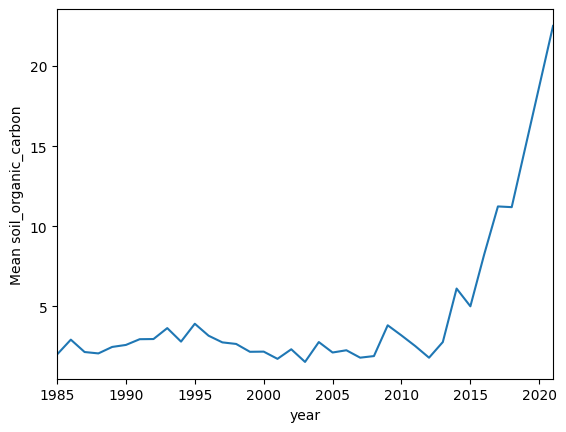

In [ ]:
ax = df['soil_organic_carbon'].plot()
ax.autoscale(axis='x', tight=True)
ax.set(ylabel='Mean soil_organic_carbon')

In [ ]:
pip install seasonal

In [ ]:
import seasonal

def seasonal_period_udf(counts):

    seasons, trend = seasonal.fit_seasons(counts, trend="spline")
    if (seasons is not None): return len(seasons)
    else: return -1

In [ ]:
seasonal_period_udf(df['soil_organic_carbon'].values)


-1

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter

#get the values
sales_cycle, sales_trend = hpfilter(df['soil_organic_carbon'], lamb=1200)

In [ ]:
df['Trend'] = sales_trend


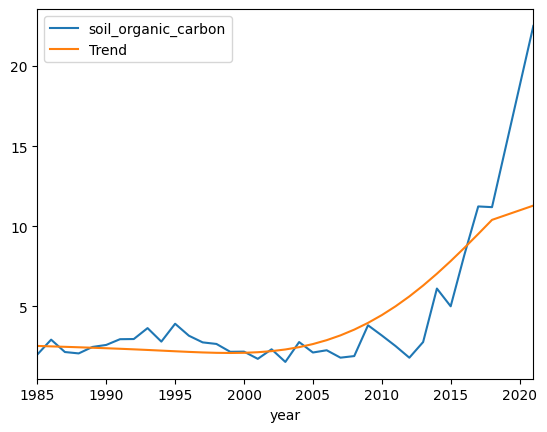

In [ ]:
df[['soil_organic_carbon', 'Trend']].plot().autoscale(axis='x', tight=True)


In [ ]:
df5_filtered.to_csv('conus_sample_sdp_2.csv')

In [ ]:
df5_filtered.groupby('year')['soil_id'].count()

year
1985.0    1726
1986.0    1211
1987.0    1675
1988.0    1823
1989.0    1774
1990.0    2448
1991.0    2583
1992.0    2372
1993.0    2240
1994.0    2267
1995.0    2110
1996.0    1698
1997.0    1329
1998.0    1076
1999.0    1064
2000.0     594
2001.0     246
2002.0     182
2003.0     816
2004.0     379
2005.0     616
2006.0     857
2007.0    1477
2008.0     586
2009.0     921
2010.0     818
2011.0    4864
2012.0      35
2013.0     220
2014.0      54
Name: soil_id, dtype: int64

In [ ]:
df5_filtered['ph_mean'].describe()

count    42956.000000
mean         6.030447
std          0.986001
min          2.485503
25%          5.243536
50%          5.890100
75%          6.565179
max          9.534649
Name: ph_mean, dtype: float64

In [ ]:
df5_filtered.shape

(43000, 24)

NameError: name 'plt' is not defined

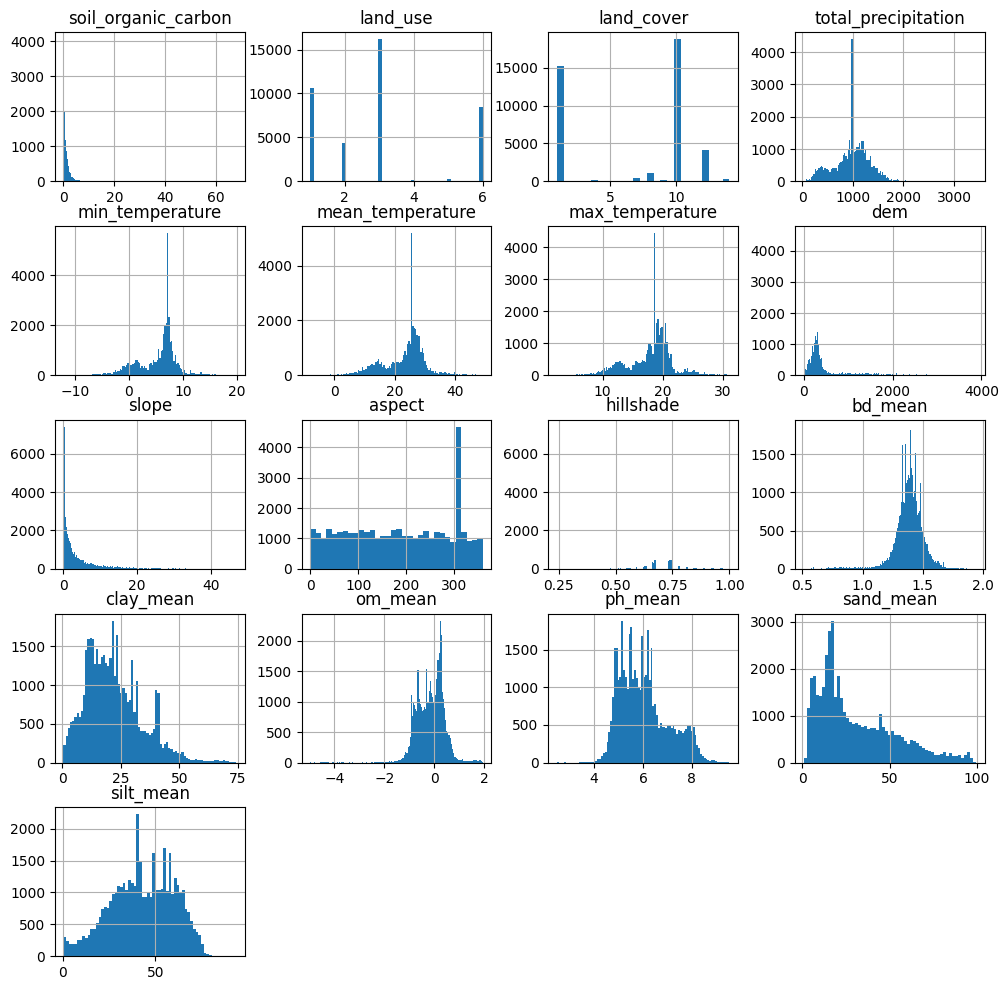

In [ ]:
df5_filtered[cls1[5:]].hist(figsize = [12,12], bins = 'auto')
plt.show()

In [ ]:
## lulc

df_batch_lulc_all=pd.read_csv('/datacollection_CONUS/merged/lulc_params_CONUS.csv')
df_batch_lulc_all

,Unnamed: 0,longitude,latitude,year,land_use,land_cover,soil_id,land_cover_class,land_use_class
0,0,-88.703417,37.113506,2003,1,10,04KY-145-001,Grass/Forb/Herb,Agriculture
1,1,-84.493889,38.105556,2008,6,10,08KY-067-004,Grass/Forb/Herb,Rangeland or Pasture
2,2,-84.853332,37.848057,2008,1,10,08KY-167-002,Grass/Forb/Herb,Agriculture
3,3,-84.216110,38.055000,2009,1,10,09KY-049-001,Grass/Forb/Herb,Agriculture
4,4,-84.213333,38.052502,2009,1,10,09KY-049-002,Grass/Forb/Herb,Agriculture
...,...,...,...,...,...,...,...,...,...
7187,7187,-91.519167,43.337500,1988,3,10,X3-862E2,Grass/Forb/Herb,Forest
7188,7188,-91.510100,43.340478,1988,1,10,X3-862E2-2,Grass/Forb/Herb,Agriculture
7189,7189,-91.292118,43.377152,1988,3,1,X3-862E-1,Trees,Forest
7190,7190,-91.342050,43.464712,1986,3,10,X3-978B-1,Grass/Forb/Herb,Forest


In [ ]:
df_batch_lulc_all.columns

Index(['Unnamed: 0', 'longitude', 'latitude', 'year', 'land_use', 'land_cover',
       'soil_id', 'land_cover_class', 'land_use_class'],
      dtype='object')

In [ ]:
cl = ['soil_id','year', 'land_use', 'land_cover','land_cover_class', 'land_use_class']
s1 = pd.merge(soil_armonized, df_batch_lulc_all[cl].drop_duplicates(), how='left', on=['soil_id','year'])
len(s1)

40302

In [ ]:
## precipitation
df_batch_precipitation=pd.read_csv('/ServingTheModel/datacollection_CONUS/precipitation_params_CONUS.csv')
df_batch_precipitation['total_precipitation']=df_batch_precipitation['prcp']
df_batch_precipitation

,Unnamed: 0,longitude,latitude,year,prcp,soil_id,total_precipitation
0,0,-88.703417,37.113506,2003,1378.44,04KY-145-001,1378.44
1,1,-84.493889,38.105556,2008,1317.27,08KY-067-004,1317.27
2,2,-84.853332,37.848057,2008,1160.41,08KY-167-002,1160.41
3,3,-84.216110,38.055000,2009,1490.98,09KY-049-001,1490.98
4,4,-84.213333,38.052502,2009,1490.98,09KY-049-002,1490.98
...,...,...,...,...,...,...,...
7187,7187,-91.519167,43.337500,1988,675.70,X3-862E2,675.70
7188,7188,-91.510100,43.340478,1988,694.99,X3-862E2-2,694.99
7189,7189,-91.292118,43.377152,1988,720.05,X3-862E-1,720.05
7190,7190,-91.342050,43.464712,1986,935.24,X3-978B-1,935.24


In [ ]:
cl = ['soil_id','year', 'total_precipitation']
s2 = pd.merge(s1, df_batch_precipitation[cl].drop_duplicates(), how='left', on=['soil_id','year'])
len(s2)
s2

,year,longitude,latitude,soil_id,soil_organic_carbon,depth_cm,land_use,land_cover,land_cover_class,land_use_class,total_precipitation
0,2003,-88.703417,37.113506,04KY-145-001,2.741401,5,1,10,Grass/Forb/Herb,Agriculture,1378.44
1,2003,-88.703417,37.113506,04KY-145-001,2.454345,15,1,10,Grass/Forb/Herb,Agriculture,1378.44
2,2003,-88.703417,37.113506,04KY-145-001,1.385365,30,1,10,Grass/Forb/Herb,Agriculture,1378.44
3,2003,-88.703417,37.113506,04KY-145-001,0.564199,60,1,10,Grass/Forb/Herb,Agriculture,1378.44
4,2003,-88.703417,37.113506,04KY-145-001,0.321449,100,1,10,Grass/Forb/Herb,Agriculture,1378.44
...,...,...,...,...,...,...,...,...,...,...,...
40297,1986,-91.342050,43.464712,X3-978B-1,0.195639,100,3,10,Grass/Forb/Herb,Forest,935.24
40298,1986,-91.340085,43.462500,X3-1163-1,1.496602,5,3,10,Grass/Forb/Herb,Forest,935.24
40299,1986,-91.340085,43.462500,X3-1163-1,1.288668,15,3,10,Grass/Forb/Herb,Forest,935.24
40300,1986,-91.340085,43.462500,X3-1163-1,0.575813,30,3,10,Grass/Forb/Herb,Forest,935.24


In [ ]:
a=df_batch_tempt.drop_duplicates()
a

,longitude,latitude,year,min_temperature,mean_temperature,max_temperature,prcp,soil_id
0,-88.703417,37.113506,2003,8.367671,27.977671,19.610000,3.776548,04KY-145-001
1,-84.493889,38.105556,2008,6.575315,25.044329,18.469014,3.608959,08KY-067-004
2,-84.853332,37.848057,2008,6.745890,25.603534,18.857644,3.179205,08KY-167-002
3,-84.216110,38.055000,2009,6.941151,24.717945,17.776795,4.084877,09KY-049-001
4,-84.213333,38.052502,2009,6.941151,24.717945,17.776795,4.084877,09KY-049-002
...,...,...,...,...,...,...,...,...
9682,-91.519167,43.337500,1988,1.294411,15.655178,14.360767,1.851233,X3-862E2
9683,-91.510100,43.340478,1988,1.092192,15.249452,14.157260,1.904082,X3-862E2-2
9684,-91.292118,43.377152,1988,1.264110,15.561890,14.297781,1.972740,X3-862E-1
9685,-91.342050,43.464712,1986,2.913507,16.610110,13.696603,2.562301,X3-978B-1


In [ ]:
cl = ['soil_id','year', 'min_temperature','mean_temperature','max_temperature']
s3 = pd.merge(s2, a[cl].drop_duplicates(), how='left', on=['soil_id','year'])
len(s3)
s3

,year,longitude,latitude,soil_id,soil_organic_carbon,depth_cm,land_use,land_cover,land_cover_class,land_use_class,total_precipitation,min_temperature,mean_temperature,max_temperature
0,2003,-88.703417,37.113506,04KY-145-001,2.741401,5,1,10,Grass/Forb/Herb,Agriculture,1378.44,8.367671,27.977671,19.610000
1,2003,-88.703417,37.113506,04KY-145-001,2.454345,15,1,10,Grass/Forb/Herb,Agriculture,1378.44,8.367671,27.977671,19.610000
2,2003,-88.703417,37.113506,04KY-145-001,1.385365,30,1,10,Grass/Forb/Herb,Agriculture,1378.44,8.367671,27.977671,19.610000
3,2003,-88.703417,37.113506,04KY-145-001,0.564199,60,1,10,Grass/Forb/Herb,Agriculture,1378.44,8.367671,27.977671,19.610000
4,2003,-88.703417,37.113506,04KY-145-001,0.321449,100,1,10,Grass/Forb/Herb,Agriculture,1378.44,8.367671,27.977671,19.610000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40297,1986,-91.342050,43.464712,X3-978B-1,0.195639,100,3,10,Grass/Forb/Herb,Forest,935.24,2.913507,16.610110,13.696603
40298,1986,-91.340085,43.462500,X3-1163-1,1.496602,5,3,10,Grass/Forb/Herb,Forest,935.24,2.913507,16.610110,13.696603
40299,1986,-91.340085,43.462500,X3-1163-1,1.288668,15,3,10,Grass/Forb/Herb,Forest,935.24,2.913507,16.610110,13.696603
40300,1986,-91.340085,43.462500,X3-1163-1,0.575813,30,3,10,Grass/Forb/Herb,Forest,935.24,2.913507,16.610110,13.696603


In [ ]:
#probabilistic
pth = '/ServingTheModel/datacollection_CONUS/merged/'

dem_merged = pd.read_csv(pth+'merged_CONUS_dem_probabilistic.csv')
len(dem_merged)

40302

In [ ]:
s3.columns

Index(['year', 'longitude', 'latitude', 'soil_id', 'soil_organic_carbon',
       'depth_cm', 'land_use', 'land_cover', 'land_cover_class',
       'land_use_class', 'total_precipitation', 'min_temperature',
       'mean_temperature', 'max_temperature'],
      dtype='object')

In [ ]:
dem_merged.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'year', 'longitude', 'latitude',
       'soil_id', 'soil_organic_carbon', 'depth_cm', 'dem', 'slope_norm',
       'aspect_rad', 'hillshade', 'depth_min', 'depth_max', 'bd_mean',
       'clay_mean', 'om_mean', 'ph_mean', 'sand_mean', 'silt_mean',
       'depth_minus'],
      dtype='object')

In [ ]:
cl = ['soil_id', 'year', 'depth_cm', 'dem', 'slope_norm',
       'aspect_rad', 'hillshade', 'depth_min', 'depth_max', 'bd_mean',
       'clay_mean', 'om_mean', 'ph_mean', 'sand_mean', 'silt_mean']
s4 = pd.merge(s3, dem_merged[cl].drop_duplicates(), how='left', on=['soil_id','year'])
len(s4)
s4

,year,longitude,latitude,soil_id,soil_organic_carbon,depth_cm_x,land_use,land_cover,land_cover_class,land_use_class,...,aspect_rad,hillshade,depth_min,depth_max,bd_mean,clay_mean,om_mean,ph_mean,sand_mean,silt_mean
0,2003,-88.703417,37.113506,04KY-145-001,2.741401,5,1,10,Grass/Forb/Herb,Agriculture,...,0.123495,0.705882,0,5,1.324076,13.199903,0.158604,5.740158,19.189690,61.346680
1,2003,-88.703417,37.113506,04KY-145-001,2.741401,5,1,10,Grass/Forb/Herb,Agriculture,...,0.123495,0.705882,5,15,1.325440,14.307805,0.102576,5.692228,21.089794,59.912338
2,2003,-88.703417,37.113506,04KY-145-001,2.741401,5,1,10,Grass/Forb/Herb,Agriculture,...,0.123495,0.705882,15,30,1.340068,17.968168,-0.077236,5.589547,19.033791,58.211220
3,2003,-88.703417,37.113506,04KY-145-001,2.741401,5,1,10,Grass/Forb/Herb,Agriculture,...,0.123495,0.705882,30,60,1.370215,22.978516,-0.429261,5.453463,17.546783,54.607632
4,2003,-88.703417,37.113506,04KY-145-001,2.741401,5,1,10,Grass/Forb/Herb,Agriculture,...,0.123495,0.705882,60,100,1.393526,22.001461,-0.741188,5.573124,21.385742,50.941406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230845,1986,-91.340085,43.462500,X3-1163-1,0.575813,30,3,10,Grass/Forb/Herb,Forest,...,0.407672,0.615686,30,60,1.455625,21.961838,-0.398730,5.782145,16.773170,57.898239
230846,1986,-91.340085,43.462500,X3-1163-1,0.211557,60,3,10,Grass/Forb/Herb,Forest,...,0.407672,0.615686,0,5,1.377766,14.664878,0.266698,6.078989,21.805283,61.174511
230847,1986,-91.340085,43.462500,X3-1163-1,0.211557,60,3,10,Grass/Forb/Herb,Forest,...,0.407672,0.615686,5,15,1.386468,15.251220,0.214454,6.068782,21.565620,61.328934
230848,1986,-91.340085,43.462500,X3-1163-1,0.211557,60,3,10,Grass/Forb/Herb,Forest,...,0.407672,0.615686,15,30,1.415965,17.580975,-0.011559,6.038316,19.703703,61.659996


In [ ]:
s4.dtypes

year                       int64
longitude                float64
latitude                 float64
soil_id                   object
soil_organic_carbon_x    float64
depth_cm_x                 int64
land_use                   int64
land_cover                 int64
land_cover_class          object
land_use_class            object
total_precipitation      float64
min_temperature          float64
mean_temperature         float64
max_temperature          float64
soil_organic_carbon_y    float64
depth_cm_y                 int64
dem                      float64
slope_norm               float64
aspect_rad               float64
hillshade                float64
depth_min                  int64
depth_max                  int64
bd_mean                  float64
clay_mean                float64
om_mean                  float64
ph_mean                  float64
sand_mean                float64
silt_mean                float64
dtype: object

In [ ]:
cl = ['soil_id','prcp', 'year', 'min_temperature', 'mean_temperature', 'max_temperature']
s1 = pd.merge(dem_merged, df_batch_all[cl].drop_duplicates(), how='left', on=['soil_id','year'])
len(s1)